## Step 1: Data Preprocessing
This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector.

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

In the above code:

- Use Keras to load the MNIST dataset.
- Normalize the image pixel values to the range [0, 1].
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data.

## Step 2: Building the Autoencoder Model
This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss.

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code:

### 1. Define the Encoder:

- Create an input layer with 784 neurons.
- Add a Dense layer with 64 neurons and ReLU activation.
### 2. Define the Bottleneck:

- Add a Dense layer with 32 neurons and ReLU activation.
### 3. Define the Decoder:

- Add a Dense layer with 64 neurons and ReLU activation.
- Add an output layer with 784 neurons and sigmoid activation.
### 4. Compile the Model:

- Use the Adam optimizer and binary crossentropy loss.

## Step 3: Training the Autoencoder
In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself.

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3626 - val_loss: 0.1789
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1700 - val_loss: 0.1448
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1407 - val_loss: 0.1265
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1251 - val_loss: 0.1170
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1171 - val_loss: 0.1119
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1128 - val_loss: 0.1092
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1101 - val_loss: 0.1069
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1078 - val_loss: 0.1042
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1050 - val_loss: 0.1025
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1030 - val_loss: 0.1006
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1016 - val_loss: 0.0994
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/st

## Step 4: Evaluating the Autoencoder
This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


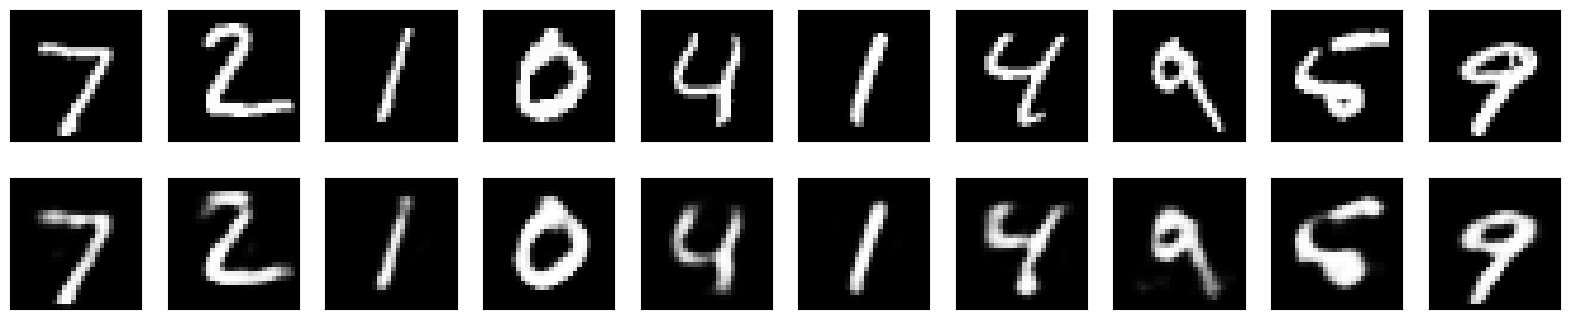

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()


In the above code:

1. Reconstruct Images:

- Use the autoencoder to predict the test data.
- Compare the original test images with the reconstructed images.
2. Visualize the Results:

- Plot a few examples of original and reconstructed images side by side.

## Step 5: Fine-Tuning the Autoencoder
Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.

In [5]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0938 - val_loss: 0.0912
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0921 - val_loss: 0.0911
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0920 - val_loss: 0.0909
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0921 - val_loss: 0.0906
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0915 - val_loss: 0.0905
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0917 - val_loss: 0.0903
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0913 - val_loss: 0.0902
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0910 - val_loss: 0.0900
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0908 - val_loss: 0.0899
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0909 - val_loss: 0.0898


In the above code:

1. Unfreeze the Encoder Layers:

- Unfreeze the last four layers of the encoder.
2. Compile and Train the Model:

- Recompile the model.
- Train the model again for 10 epochs with the same training and validation data.

## Step 6: Denoising Images with Autoencoder
In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images.

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2095 - val_loss: 0.1427
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1408 - val_loss: 0.1335
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1330 - val_loss: 0.1291
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1293 - val_loss: 0.1268
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1273 - val_loss: 0.1256
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1259 - val_loss: 0.1244
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1250 - val_loss: 0.1239
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1243 - val_loss: 0.1232
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1236 - val_loss: 0.1230
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1232 - val_loss: 0.1229
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1228 - val_loss: 0.1228
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

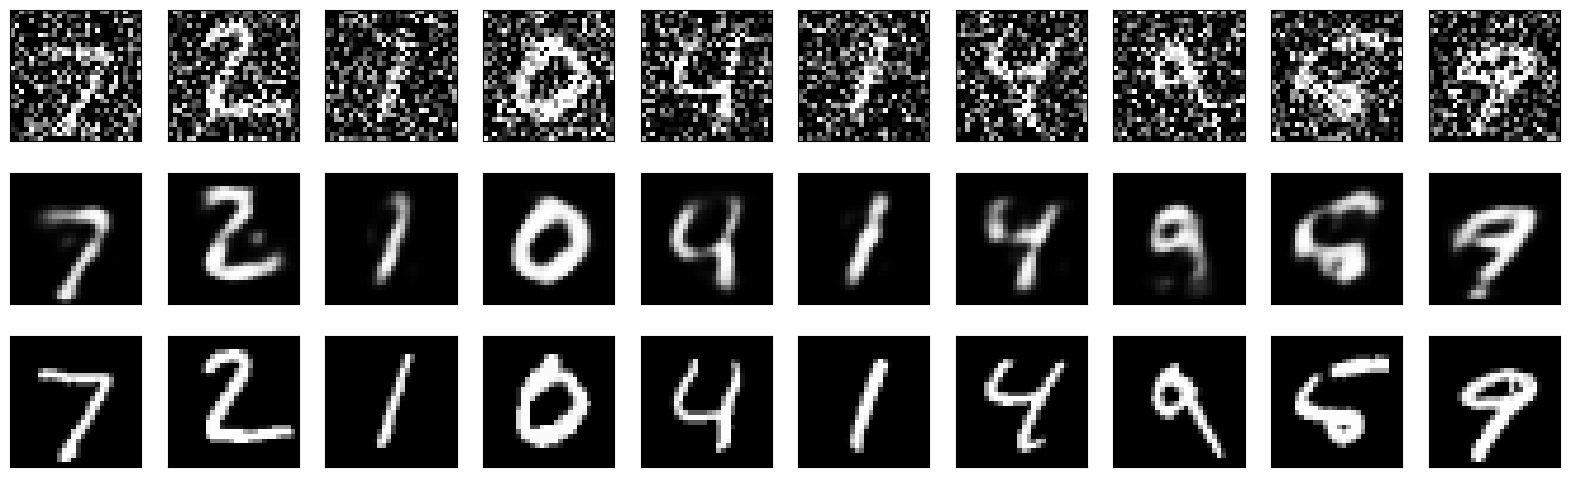

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In the above code:

1. Add noise to the data:

- Add random noise to the training and test data.
- Train the Autoencoder with noisy data: -Train the autoencoder using the noisy images as input and the original  images as target.
2. Evaluate the denoising performance:

- Use the autoencoder to denoise the test images.
- Compare the noisy, denoised, and original images.